In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.graph_objects as go
import folium
import plotly.express as px
import os

In [ ]:
data = pd.read_csv("/content/Selfie_Related_Injuries.csv")
data.head()

,Date,Country,Injuries/Casualties,Type,Description
0,15 October 2011,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,March 2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
2,March 2014,Russia,1,Transport,Two people were walking near train tracks when...
3,April 2014,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,22 April 2014,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [ ]:
print(data)

                Date        Country  Injuries/Casualties           Type  \
0    15 October 2011  United States                    3      Transport   
1         March 2014          Spain                    1  Electrocution   
2         March 2014         Russia                    1      Transport   
3         April 2014  United States                    1      Transport   
4      22 April 2014         Russia                    1           Fall   
..               ...            ...                  ...            ...   
187      16 May 2021      Indonesia                    9        Drowned   
188     10 July 2021      Hong Kong                    1           Fall   
189     11 July 2021          India                   11  Electrocution   
190     28 July 2021          Italy                    1           Fall   
191    6 August 2021        Hungary                    1           Fall   

                                           Description  
0    Three teenagers (two sisters and a fr

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 192 non-null    object
 1   Country              192 non-null    object
 2   Injuries/Casualties  192 non-null    int64 
 3   Type                 192 non-null    object
 4   Description          192 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


# **statistical calculations of our DataFrame numeric columns**

In [ ]:
data['Injuries/Casualties'].mean()

1.8333333333333333

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


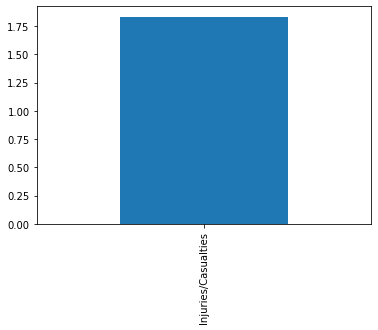

In [ ]:
data.mean().plot(kind='bar');

In [ ]:
data.describe().round()

,Injuries/Casualties
count,192.0
mean,2.0
std,4.0
min,1.0
25%,1.0
50%,1.0
75%,2.0
max,48.0


# **Arranging the Data into Correct Formate 🕦**

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Country,Injuries/Casualties,Type,Description
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
2,2014-03-01,Russia,1,Transport,Two people were walking near train tracks when...
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


# **Inspecting Which Country Have the most registered Cases of Injuries/Casualties**

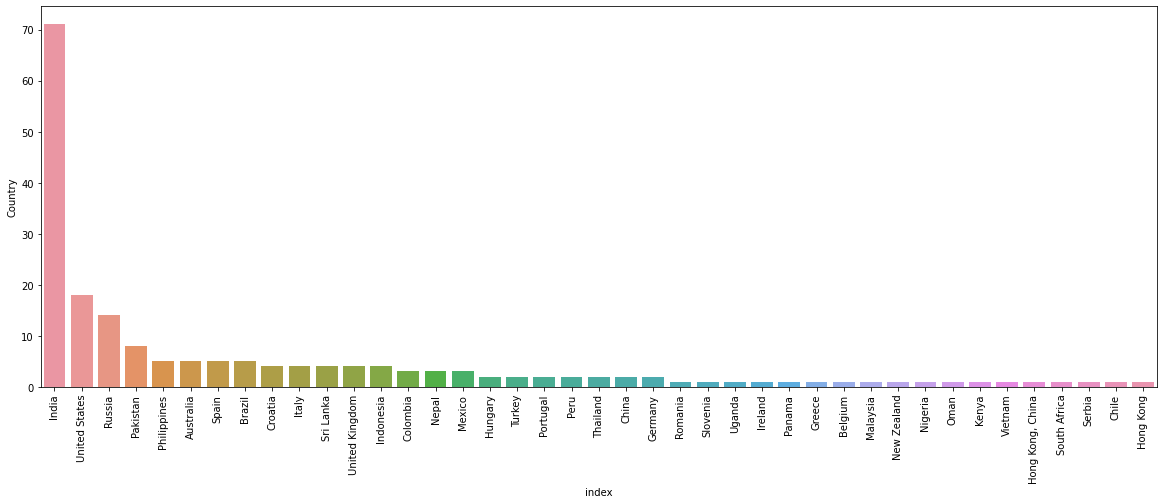

In [ ]:
country_data = data["Country"].value_counts().reset_index()

plt.figure(figsize=(20,7))
sns.barplot(x="index", y="Country", data=country_data)
plt.xticks(rotation=90)
plt.show()

# **Analysing Which Country have how much number of Injuries/Casualties Cases**

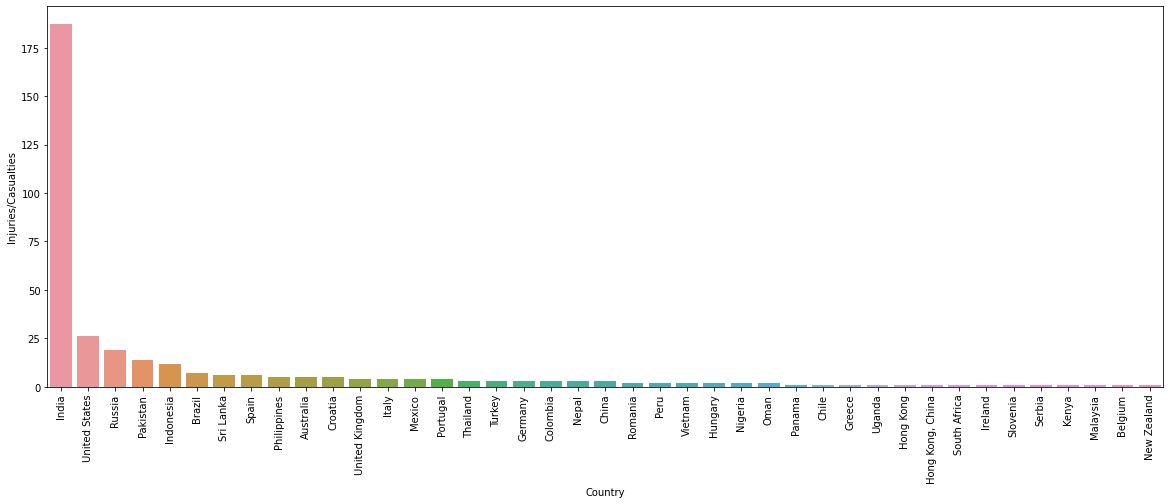

In [ ]:
grouped_data_country = data.groupby("Country").sum().reset_index().sort_values(['Injuries/Casualties'], ascending=False)

plt.figure(figsize=(20,7))
sns.barplot(x="Country", y="Injuries/Casualties", data=grouped_data_country)
plt.xticks(rotation=90)
plt.show()

# **Analysing How the Injury Took Place**

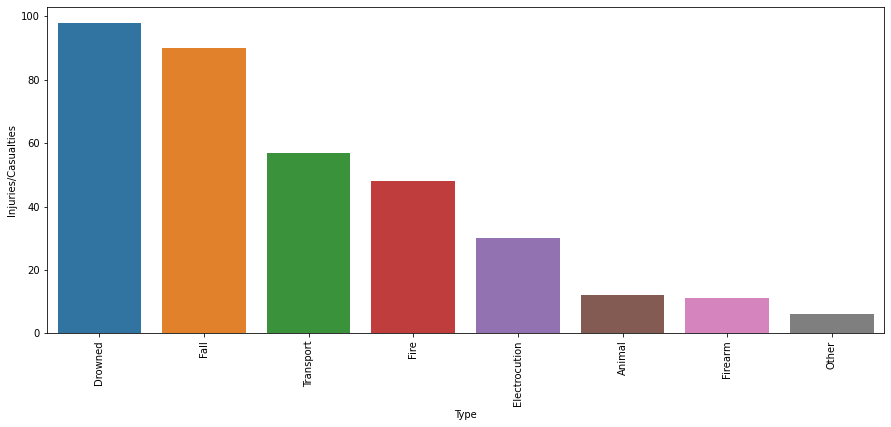

In [ ]:
grouped_data_type = data.groupby("Type").sum().reset_index().sort_values(['Injuries/Casualties'], ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x="Type", y="Injuries/Casualties", data=grouped_data_type)
plt.xticks(rotation=90)
plt.show()


# **Analysing the Data between Country, Injuries/Casualties and how or when Injury took Place**

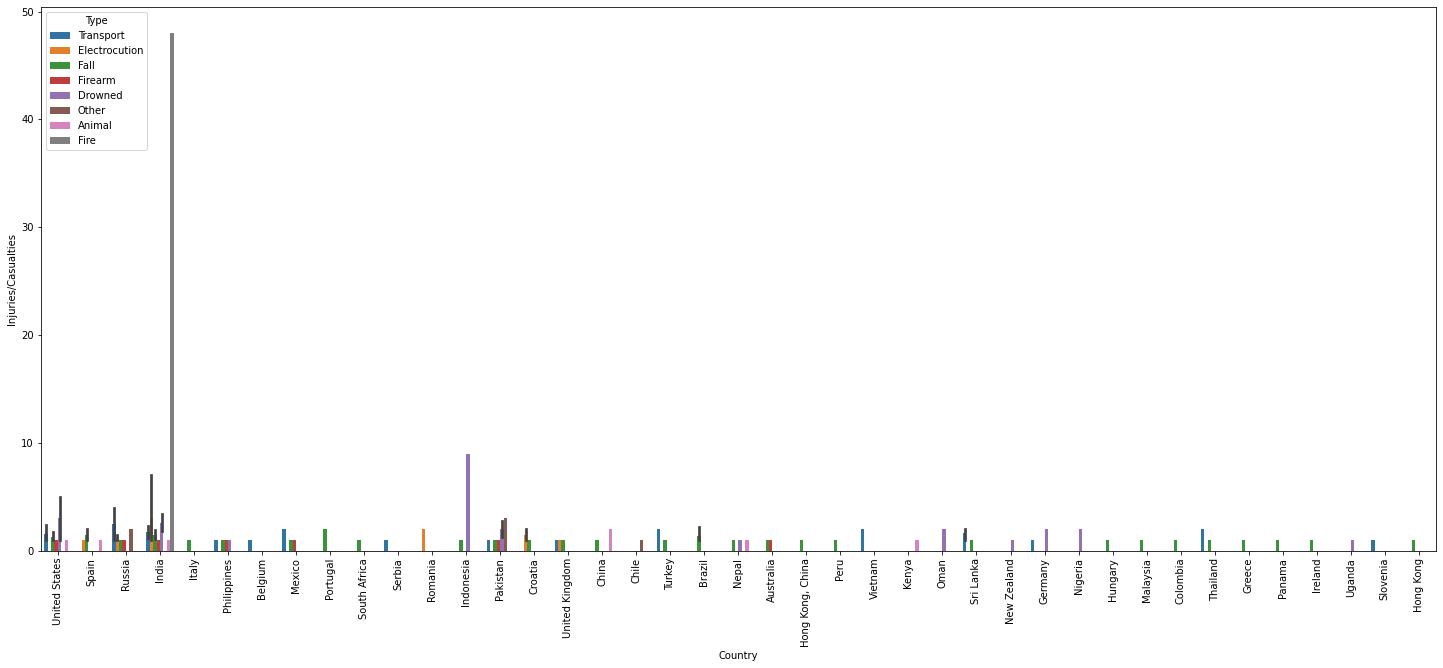

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x="Country", y="Injuries/Casualties", hue="Type", data=data)
plt.xticks(rotation=90)
plt.show()

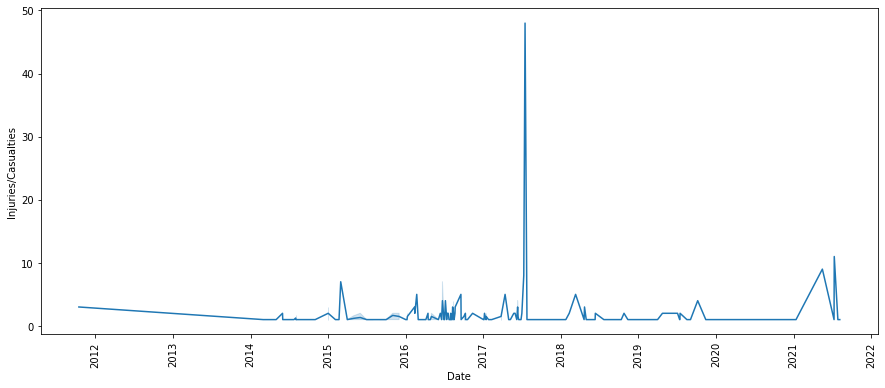

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x="Date", y= "Injuries/Casualties",data=data)
plt.xticks(rotation=90)
plt.show()

# **Conclusion (Result Of Analysis)🤔**

1) India has the most cases Recorded and it also has the largest Injuries/Casualties rates in terms of number according to the data.

2) Drowning and Falling from Somewhere are two most common Cause of Injuries/Casualties.

3) In India almost 90% + Injuries/Casualties are Caused by fire where as in Indonesia Drowning is the major Cause of Injuries/Casualties.

4) Time Between 2017 and 2018 was the time when the Injuries/Casualties rates Spiked Rapidly but the good thing is rates again also came down. 